In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In this miniproject I will practice concatenation, merging and cleaning the dataset which include cleaning directly and also making the data clearer and more understandable. The dataset that I'm using is from [Kaggle](https://www.kaggle.com/unsdsn/world-happiness), this is a World Happiness Report - Happiness scored according to economic production, social support and other factors.

- Country - Name of the country.
- Region - Name of the region the country belongs to.
- Happiness Rank - The rank of the country, as determined by its happiness score.
- Happiness Score - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10.
- Standard ErrorThe standard error of the happiness score.
- Economy (GDP per Capita)The extent to which GDP contributes to the calculation of the Happiness Score.
- Family - The estimated extent to which family contributes to the happiness score.
- Health (Life Expectancy)The extent to which Life expectancy contributed to the calculation of the Happiness Score
- Freedom - The estimated extent to which freedom contributes to the happiness score.
- Trust (Government Corruption)The extent to which Perception of Corruption contributes to Happiness Score.
- Generosity - The estimated extent to which generosity contributes to the happiness score.
- Dystopia ResidualThe extent to which Dystopia Residual contributed to the calculation of the Happiness Score. Dystopia is the opposite to Utopia.

In [2]:
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2016 = pd.read_csv('World_Happiness_2016.csv')
happiness2017 = pd.read_csv('World_Happiness_2017.csv')

In [3]:
happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

### Concatenate

In [4]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

In [5]:
head_2015

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015


In [6]:
head_2016

,Country,Happiness Score,Year
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


I have two small dataframes(this same size) that I want to concat, below there are results for two axis.

In [7]:
concat_axis0 = pd.concat([head_2015, head_2016], axis=0, sort=True)
concat_axis0

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


In [8]:
concat_axis1 = pd.concat([head_2015, head_2016], axis=1, sort=True)
concat_axis1

,Country,Happiness Score,Year,Country,Happiness Score,Year
0,Switzerland,7.587,2015,Denmark,7.526,2016
1,Iceland,7.561,2015,Switzerland,7.509,2016
2,Denmark,7.527,2015,Iceland,7.501,2016


The next excersice is to combine two tables of different sizes.

In [9]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

In [10]:
concat_axis0 = pd.concat([head_2015, head_2016], axis = 0, sort=True)
concat_axis0

,Country,Happiness Score,Standard Error,Year
0,Switzerland,7.587,0.03411,2015
1,Iceland,7.561,0.04884,2015
2,Denmark,7.527,0.03328,2015
3,Norway,7.522,0.03880,2015
0,Denmark,7.526,NaN,2016
1,Switzerland,7.509,NaN,2016
2,Iceland,7.501,NaN,2016


In [11]:
print(len(concat_axis0), len(concat_axis0.columns))

7 4


In [12]:
concat_axis1 = pd.concat([head_2015, head_2016], axis = 1, sort=True)
concat_axis1

,Year,Country,Happiness Score,Standard Error,Country,Happiness Score,Year
0,2015,Switzerland,7.587,0.03411,Denmark,7.526,2016.0
1,2015,Iceland,7.561,0.04884,Switzerland,7.509,2016.0
2,2015,Denmark,7.527,0.03328,Iceland,7.501,2016.0
3,2015,Norway,7.522,0.03880,NaN,NaN,NaN


In [13]:
concat_axis1 = pd.concat([head_2016, head_2015], axis = 1, sort=True)
concat_axis1

,Country,Happiness Score,Year,Year,Country,Happiness Score,Standard Error
0,Denmark,7.526,2016.0,2015,Switzerland,7.587,0.03411
1,Switzerland,7.509,2016.0,2015,Iceland,7.561,0.04884
2,Iceland,7.501,2016.0,2015,Denmark,7.527,0.03328
3,NaN,NaN,NaN,2015,Norway,7.522,0.03880


In [14]:
print(len(concat_axis1), len(concat_axis1.columns))

4 7


For different sizes, rows are included and missing values are replaced by NaN.

In [15]:
concat_update_index = pd.concat([head_2015, head_2016], axis=0, ignore_index=True, sort=True)
concat_update_index

,Country,Happiness Score,Standard Error,Year
0,Switzerland,7.587,0.03411,2015
1,Iceland,7.561,0.04884,2015
2,Denmark,7.527,0.03328,2015
3,Norway,7.522,0.03880,2015
4,Denmark,7.526,NaN,2016
5,Switzerland,7.509,NaN,2016
6,Iceland,7.501,NaN,2016


'ignore_index=True' helped with index reset

### Merge

In [16]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

In [17]:
three_2015

,Country,Happiness Rank,Year
2,Denmark,3,2015
3,Norway,4,2015
4,Canada,5,2015


In [18]:
three_2016

,Country,Happiness Rank,Year
2,Iceland,3,2016
3,Norway,4,2016
4,Finland,5,2016


In [19]:
merged = pd.merge(left=three_2015, right=three_2016, on='Country')
merged

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


As seen above, the merge result is only matching data, it is equivalent to a join command in SQL

In [20]:
merged_left = pd.merge(left=three_2015, right=three_2016, on='Country', how = 'left')

In [21]:
merged_left = pd.merge(left=three_2015, right=three_2016, on='Country', how = 'left')
merged_left

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


In [22]:
merged_left_reverse = pd.merge(left=three_2016, right=three_2015, on='Country', how = 'left')
merged_left_reverse

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


In [23]:
merged_suffixes = pd.merge(left=three_2015, right=three_2016, how='left', on='Country', suffixes=('_2015', '_2016'))
merged_suffixes

,Country,Happiness Rank_2015,Year_2015,Happiness Rank_2016,Year_2016
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


In [24]:
merged_reverse_suffixes = pd.merge(left=three_2016, right=three_2015, how='left', on='Country', suffixes=('_2016', '_2015'))
merged_reverse_suffixes

,Country,Happiness Rank_2016,Year_2016,Happiness Rank_2015,Year_2015
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


In [25]:
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

In [26]:
four_2015

,Country,Happiness Rank,Year
2,Denmark,3,2015
3,Norway,4,2015
4,Canada,5,2015
5,Finland,6,2015


In [27]:
three_2016

,Country,Happiness Rank,Year
2,Iceland,3,2016
3,Norway,4,2016
4,Finland,5,2016


In [28]:
merge_index = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016'))
merge_index

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3,2016
3,Norway,4,2015,Norway,4,2016
4,Canada,5,2015,Finland,5,2016


In [29]:
merge_index_left = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, how = 'left', suffixes = ('_2015','_2016'))
merge_index_left

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3.0,2016.0
3,Norway,4,2015,Norway,4.0,2016.0
4,Canada,5,2015,Finland,5.0,2016.0
5,Finland,6,2015,NaN,NaN,NaN


### Cleaning

In [30]:
happiness2017.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


In [31]:
happiness2017.rename(columns={'Happiness.Rank': 'Happiness Rank',
                              'Happiness.Score': 'Happiness Score',
                              'Economy..GDP.per.Capita.':'Economy (GDP per Capita)',
                              'Dystopia.Residual':'Dystopia Residual',
                              'Health..Life.Expectancy.':'Health (Life Expectancy)',
                              'Trust..Government.Corruption.':'Trust (Government Corruption)'}, inplace=True)

In [32]:
happiness2017.head(2)

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


In [33]:
happiness2016.head(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016


In [34]:
happiness2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


In [35]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], axis=0, sort=True)

In [36]:
combined[combined.Country == 'Norway']

,Country,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Lower Confidence Interval,Region,Standard Error,Trust (Government Corruption),Upper Confidence Interval,Whisker.high,Whisker.low,Year
3,Norway,2.465310,1.459000,1.330950,0.669730,0.346990,4,7.522,0.885210,NaN,Western Europe,0.0388,0.365030,NaN,NaN,NaN,2015
3,Norway,2.664650,1.577440,1.126900,0.596090,0.378950,4,7.498,0.795790,7.421,Western Europe,NaN,0.357760,7.575,NaN,NaN,2016
0,Norway,2.277027,1.616463,1.533524,0.635423,0.362012,1,7.537,0.796667,NaN,NaN,NaN,0.315964,NaN,7.594445,7.479556,2017


### Pivot table and plo Happiness Score

In [37]:
pivot_table_combined = combined.pivot_table(values = 'Happiness Score', index = 'Year', aggfunc=np.mean)
pivot_table_combined

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


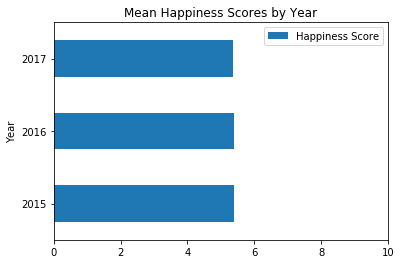

In [38]:
pivot_table_combined.plot(kind='barh', title = 'Mean Happiness Scores by Year', xlim=(0,10))

### Which of the factors above contribute the most to the happiness score?

In [39]:
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }

happiness2015 = happiness2015.rename(mapping, axis=1)

In [40]:
happiness2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


### Apply and map function on Series

In [41]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

In [42]:
economy_impact_map = happiness2015.Economy.map(label)
economy_impact_map.value_counts()

Low     92
High    66
Name: Economy, dtype: int64

In [43]:
economy_impact_apply = happiness2015.Economy.apply(label)
economy_impact_apply.value_counts()

Low     92
High    66
Name: Economy, dtype: int64

In [44]:
equal = economy_impact_map.equals(economy_impact_apply)
equal

True

In [45]:
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'

In [46]:
economy_impact_apply = happiness2015['Economy'].apply(label, x=0.8)
economy_impact_apply.value_counts()

High    93
Low     65
Name: Economy, dtype: int64

In [47]:
happiness2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


In [48]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

Using applymap formultiple column

In [49]:
economy_apply = happiness2015.Economy.apply(label)
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']

factors_impact = happiness2015[factors].applymap(label)
factors_impact.head(2)

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low


The results show that for this two countries the Economy and Family had a high impact on the happiness score, the rest of the criteria not so much. 

In [50]:
factors_impact.apply(pd.value_counts)

,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
Low,92,69,156,158.0,158.0,158.0


In [51]:
def v_counts(col):
    num = col.value_counts()
    den = col.size
    return num/den

Percentage of High and Low values in each column

In [52]:
v_counts_pct = factors_impact.apply(v_counts)
v_counts_pct

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


The percentage calculation that makes up the happiness score. Sum of the factors is equal to Happiness Score.

In [53]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

def percentages(col):
    div = col/happiness2015['Happiness Score']
    return div * 100

factor_percentages = happiness2015[factors].apply(percentages)
factor_percentages.head(3)

,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691,33.180177
1,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401,35.736146
2,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539,33.108011


In [54]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']

melt = pd.melt(happiness2015, id_vars=main_cols, value_vars=factors)

melt['Percentage'] = round(melt['value']/melt['Happiness Score']*100,2)
melt.head(2)

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22


In [55]:
melt.tail(2)

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
1104,Burundi,Sub-Saharan Africa,157,2.905,Dystopia Residual,1.83302,63.1
1105,Togo,Sub-Saharan Africa,158,2.839,Dystopia Residual,1.56726,55.2


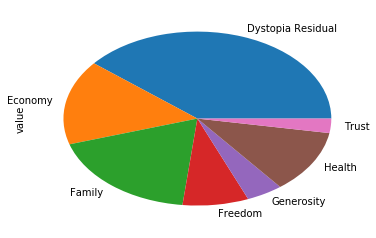

In [56]:
pv_melt = melt.pivot_table(values='value', index='variable')

pv_melt.plot(kind='pie', y='value', legend=False)

As it seen above, Dystopia Residual has a big impact but apart from that, the other important factors are as follows
- Economy
- Family
- Health